# Handwritten digits classification using neural network

## In this notebook we will classify handwritten digits using a Artificial neural network

In [32]:
#Import all important libraries which will be in use
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset directly from keras.datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# number of rows in training daataset
len(X_train)

60000

In [4]:
# number of rows in testing dataset
len(X_test)

10000

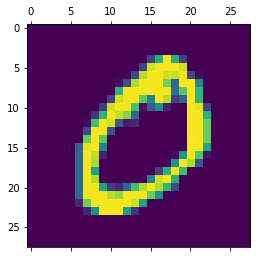

In [5]:
# using matplot library the image is showing of 28 x 28 pixels
plt.matshow(X_train[1])

In [6]:
X_test.shape

(10000, 28, 28)

The matrix is in the form of 28 x 28 pixels, but we cannot pass these arrays into our deep learning model. We have to convert it into 1d array 

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As, we can see that the values are ranges from 0-255, first we have to normalize it with the help of keras normalize function. 

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

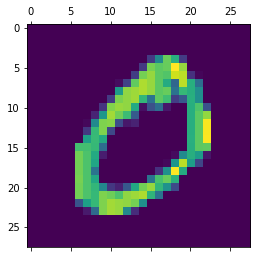

In [10]:
# Now if we see our image it will be different because of the normalization.
plt.matshow(X_train[1])

We will convert our 2d array of 28 x 28 into 1d array of 784 by the help of keras layer

Now the training and testing datasets are ready, lets make a ANN model. 

In [11]:
model = tf.keras.models.Sequential()

In [12]:
# Adding a flattening layer
model.add(tf.keras.layers.Flatten())

In [13]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [15]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [16]:
# Compiling the ANN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Fitting the model with X_train and y_train
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2636 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0745 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0540 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0411 - accuracy: 0.9862


In [18]:
# testing our model on the test data to find val loss and val accuracy
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9725
0.09633659571409225
0.9725000262260437


We can save our model into epic_num_reader file for any furthur use.

In [19]:
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [20]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Predicting the test dataset with our model

In [21]:
predictions = new_model.predict(X_test)

In [22]:
print(predictions)

[[9.9629723e-12 3.4520000e-09 3.2399374e-08 ... 1.0000000e+00
  7.0288282e-11 1.2313798e-08]
 [4.4554841e-13 3.3683893e-05 9.9996543e-01 ... 1.3137543e-13
  1.4311843e-09 5.7782699e-15]
 [1.0796574e-08 9.9999154e-01 1.1180451e-06 ... 1.0108232e-06
  3.1509412e-06 5.6672384e-08]
 ...
 [2.6566421e-11 2.3204941e-06 1.3890695e-09 ... 3.6163929e-06
  5.3883372e-08 5.0292315e-06]
 [1.0801058e-09 7.9107089e-11 1.4331446e-09 ... 1.8314718e-09
  2.9023952e-06 2.4296921e-12]
 [1.1679792e-10 7.8153151e-10 1.2836944e-10 ... 1.4922888e-12
  1.8746749e-09 1.4617571e-12]]


That sure doesn't start off as helpful, but recall these are probability distributions. We can get the actual number pretty simply

In [23]:
print(np.argmax(predictions[0]))

7


Now let's check it with the input to match that the number we predicted is actually 7 or not??

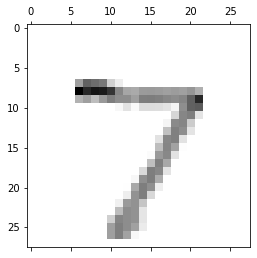

In [24]:
plt.matshow(X_test[0], cmap=plt.cm.binary)

#### Awesome! the number we predicted with our model and the input we have given are same. The Model is working perfectly.

As we have see above that the prediction variable will gives us 10 different values, so we have to use numpy argmax function which returns the index of maximum element in an array.

In [25]:
#By using List comprehension we will iterate through every predictions.
y_prediction_labels = [np.argmax(i) for i in predictions]

In [27]:
y_prediction_labels[:5]

[7, 2, 1, 0, 4]

Let's see a confusion Matrix of our y_test and y_pred

In [28]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_prediction_labels)

In [29]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    1,    2,    0],
       [   0, 1124,    3,    1,    0,    2,    3,    0,    2,    0],
       [   3,    0, 1012,    7,    0,    1,    1,    6,    2,    0],
       [   0,    0,    4,  981,    0,   14,    0,    8,    2,    1],
       [   0,    1,    4,    0,  955,    0,    5,    5,    2,   10],
       [   1,    0,    2,   13,    0,  871,    2,    1,    1,    1],
       [   4,    3,    3,    2,    3,    9,  934,    0,    0,    0],
       [   2,    8,    7,    2,    1,    0,    0, 1005,    0,    3],
       [   2,    2,    5,   12,    9,   16,    2,    6,  913,    7],
       [   0,    6,    1,   11,   11,    6,    1,    6,    2,  965]])>

Text(69.0, 0.5, 'Truth')

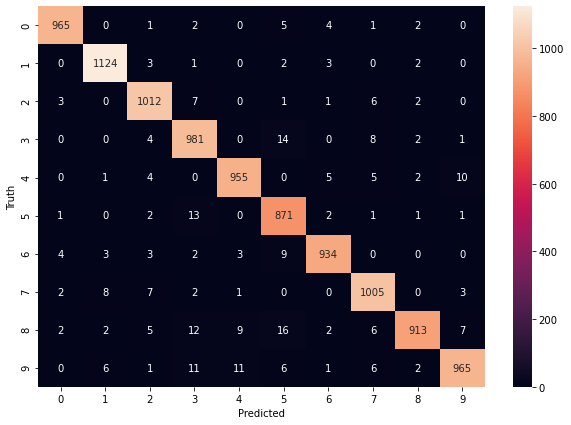

In [34]:
# for better visualization let's see our confusion matrix in Heatmap.
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

From this Confusion matrix we can conclude that :-
- The diagonal values are the true values.
- The values other than diagonal are the errors.